# Project : InstaBot - II

Importing the relevant libraries and starting the webdriver session

In [36]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import re



# Disable Chrome Browser Notification
option = Options()
option.add_argument("--disable-infobars")
option.add_argument("start-maximized")
option.add_argument("--disable-extensions")
option.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 1 
})

driver=webdriver.Chrome()  ## set executable path
driver.get("https://www.instagram.com/")

Logging into your instagram account

In [37]:
def login():
    
    username = driver.find_element_by_name('username')
    username.send_keys('username')
    
    password = driver.find_element_by_name('password')
    password.send_keys('password')
    password.submit()
    
    time.sleep(6)
    
    #to handle pop-up notification
    try:
        driver.find_element_by_xpath("/html/body/div[4]/div/div/div[3]/button[2]").click() 
    except NoSuchElementException:
        pass
login()

Q1. 1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [38]:
def get_follower_count(user_handle): 
    time.sleep(1)
    base_url = "https://instagram.com"
    driver.get(base_url+user_handle[1])
    time.sleep(2)
    tag = driver.find_element_by_partial_link_text("followers")
    data = BeautifulSoup(tag.get_attribute('outerHTML'),'html.parser').find('span').get('title')
    follower_count = int(data.replace(',',''))
    user_id_followers.append([follower_count,user_handle[0],user_handle[1]])



driver.get('https://instagram.com/')
search_input =    driver.find_element_by_xpath("//input[@placeholder='Search']")
search_input.clear()
search_input.send_keys("food")
user_ids = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//div[@class='fuqBx']//a")))

# Store user_handles with profile links
store_user_ids = []
for user_id in user_ids:
    html_content = user_id.get_attribute('outerHTML')
    data = BeautifulSoup(html_content,'html.parser').a['href']
    user_id = data.split('/')[1]
    if user_id!='explore':
        store_user_ids.append([user_id,data])
        

# Only 10 user id with there profile link
store_user_ids = store_user_ids[:10]

user_id_followers = []

    
for user_id in store_user_ids:
    get_follower_count(user_id)

# TOP FIVE USER HANDLES WITH FOLLOWERS, PROFILE LINK
user_id_followers.sort(reverse=True)
user_id_followers = user_id_followers[:5]
for user_id in user_id_followers:
    print(user_id)

[10964780, 'foodnetwork', '/foodnetwork/']
[1540711, 'yourfoodlab', '/yourfoodlab/']
[193495, 'streetfoodrecipe', '/streetfoodrecipe/']
[132753, 'delhifoodwalks', '/delhifoodwalks/']
[104678, 'food', '/food/']


2. Now Find the number of posts these handles have done in the previous 3 days.

In [40]:
def post_date_check(user_url):
    base_url = "https://instagram.com"
    driver.get(base_url+user_url)
    time.sleep(2)

    post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='v1Nh3 kIKUG  _bz0w']")))
    post.click()
    no_of_posts = 0
    try:
        while True:
            time_of_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//a[@class='c-Yi7']/time")))
            date_of_post = BeautifulSoup(time_of_post.get_attribute('outerHTML'),'html.parser').find('time').get('title')
            date_of_post = date_of_post.replace(',', '')
            post_date = datetime.strptime(date_of_post, '%b %d %Y').date()
            current_date = datetime.today().strftime('%Y-%m-%d')
            current_date = datetime.strptime(current_date, '%Y-%m-%d').date()
            difference_in_date = (current_date-post_date).days
            next_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div/a[@class=' _65Bje  coreSpriteRightPaginationArrow']")))
            next_post.click()
            if difference_in_date>3:
                break
                
            no_of_posts+=1
            time.sleep(2)
    except:
        return no_of_posts
        
    return no_of_posts;        
        
user_handles = []
post_counts = []
for user_detail in user_id_followers:
    user_handles.append(user_detail[1])
    post_count = post_date_check(user_detail[2])
    post_counts.append(post_count)
    time.sleep(3)

3. Depict this information using a suitable graph.

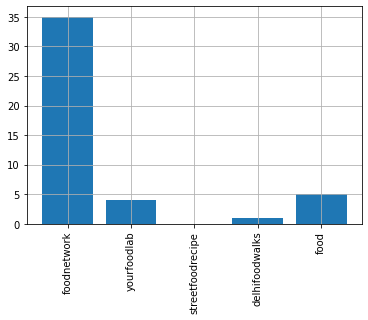

In [41]:

plt.bar(user_handles,post_counts)
plt.xticks(rotation=90)
plt.grid()
plt.show()


Q2 Your friend also needs a list of hashtags that he should use in his posts.

1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

3.Create a csv file with two columns : the word and its frequency

4.Now, find the hashtags that were most popular among these bloggers

5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts

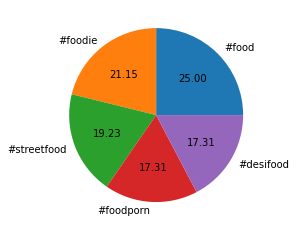

In [42]:

def post_check(user_url):
    base_url = "https://instagram.com"
    driver.get(base_url+user_url)
    time.sleep(2)

    post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='v1Nh3 kIKUG  _bz0w']")))
    post.click()
    no_of_posts = 1
    total_likes = 0
    post_for_like = 0
    texts = ""
    try:
        while True:
            content = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='C4VMK']/span")))
            text = BeautifulSoup(content.get_attribute('outerHTML'),'html.parser').find('span').text
            texts = texts + str(" ") + str(text)
            like_data = driver.find_element_by_xpath("//section[@class='EDfFK ygqzn']")
            likes = BeautifulSoup(like_data.get_attribute('outerHTML'),'html.parser').find('span').text.replace(',','')
            if "views" not in likes:
                total_likes += int(likes)
                post_for_like+=1
            else:
                button_like = driver.find_element_by_xpath('//span[contains(.," views")]')
                driver.execute_script("arguments[0].click();", button_like)
                like_data = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//section[@class='EDfFK ygqzn']//div[contains(.,' likes')]")))
                like_html_data = BeautifulSoup(like_data.get_attribute('outerHTML'),'html.parser')
                likes = int(like_html_data.find(class_ = 'vJRqr').find('span').text.replace(",",''))
                total_likes +=likes
                post_for_like+=1


            next_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div/a[@class=' _65Bje  coreSpriteRightPaginationArrow']")))
            driver.execute_script("arguments[0].click();", next_post)

            if no_of_posts==10:
                break

            no_of_posts+=1
            time.sleep(2)
    except:
        print("Failed")
        return [texts,total_likes,post_for_like]
        
    return [texts,total_likes,post_for_like]        

# Special characters to be removed
characters_not_required = "[-/\"/=/+/“/”/*/-/👀/📷/😂/❤️/💪/🤦/🙄/😩/🤦🏻/🤤/🌍/🍜/🇫🇷/👉/😱/🍕/🙌/🍞/🍩/🍫/🍌/🍓/☕️/🍻/✈️/🍰/🍣/🌎/🍨/🍔/🍫/♂️/♀️/🍗/🥩/🍖/🌶/😋/👨‍/😮/😍/🍳/@/,/?/🔥/👏/😉/)/🥓/(/|/0-9/./:/!/💕/🌮/>/</🍴/🍅/🧀/🎉/🔒]"

def get_word_frequency(content,words_dictionary,hastag_dictionary):
    words = content.split(" ")
    for word in words:
        word = re.sub(characters_not_required, "", word)
        if word!="":
            if word[0]=="#":
                hastag_dictionary[word] = hastag_dictionary.get(word,0)+1
                continue
            words_dictionary[word] = words_dictionary.get(word,0)+1
            
            
    

user_handles = []
post_contents = []
for user_detail in user_id_followers:
    user_handles.append(user_detail[1])
    post_content = post_check(user_detail[2])
    post_contents.append(post_content)
    time.sleep(3)

# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.    
words_dictionary = {}

# Prepare a list of all #hashtag used in all the scraped posts and calculate the frequency of each hastag.    
hastag_dictionary = {}
for content in post_contents:
    get_word_frequency(content[0],words_dictionary,hastag_dictionary)
    

words = [ key for key,value in words_dictionary.items()]
word_frequency = [ value for key,value in words_dictionary.items()]

# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}
# Dataframe created using Pandas which will help us to create the CSV file
words_df = pd.DataFrame(columns)
# Create the CSV file without Index values
words_df.to_csv(r'WordFrequency.csv', index=False)


# Now, find the hashtags that were most popular among these bloggers
hastag_with_frequency = [[value,key] for key,value in hastag_dictionary.items()]
hastag_with_frequency.sort(reverse=True)

# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]]
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

# Pie graph to get the idea of which hashtag has been used for most of the time.
plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")
plt.show()

Q3. You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:

1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

2.Calculate the average likes for a handle.

3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

4.Create a bar graph to depict the above obtained information.

---------------------------------
Total Likes for 10 Posts
---------------------------------
foodnetwork 127893
yourfoodlab 294769
streetfoodrecipe 43932
delhifoodwalks 7823
food 10128
---------------------------------
Average Likes
---------------------------------
foodnetwork 12789
yourfoodlab 29477
streetfoodrecipe 4393
delhifoodwalks 782
food 1013
---------------------------------
Ratio Avg Followers : Avg Likes
---------------------------------
foodnetwork 857 : 12789
yourfoodlab 52 : 29476
streetfoodrecipe 44 : 4393
delhifoodwalks 169 : 782
food 103 : 1012


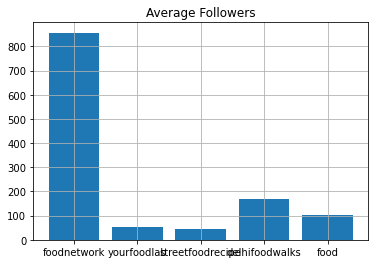

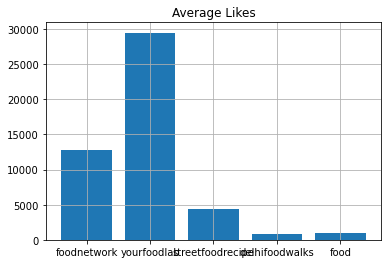

In [43]:

print("---------------------------------")
print("Total Likes for 10 Posts")
print("---------------------------------")
for i in range(5):
    print(user_handles[i],post_contents[i][1])
    
# Calculate the average likes for a handle.
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
# To store the average_likes for each handle
average_likes_list = []
for i in range(5):
    average_likes = post_contents[i][1]/post_contents[i][2]
    average_likes_list.append(average_likes)
    print(user_handles[i],format(average_likes,".0f"))


    
    
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")
avg_followers = []
for i in range(5):
    avg_followers_count = int(user_id_followers[i][0]/average_likes_list[i])
    avg_followers.append(avg_followers_count)
    print(user_id_followers[i][1],avg_followers_count,':',int(average_likes_list[i]))


    
# Create a bar graph to depict the above obtained information.
plt.bar(user_handles,avg_followers)
plt.title('Average Followers')
plt.grid()
plt.show()

plt.bar(user_handles,average_likes_list)
plt.title('Average Likes')
plt.grid()
plt.show()